In [1]:
#default_exp evaluation 

In [2]:
%cd ..
%matplotlib inline

/home/kuba/Projects/deeplearning_image_pixelwise


In [3]:
#export
import sys
from tensorflow.keras import losses, metrics, layers, models
from deeplearning_image_pixelwise import data, config, segmentation_model_training 

import tensorflow as tf
from mlutil import guild
import skimage
import numpy as np

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    

if config.float_dtype == 'float16':
    tf.keras.backend.set_floatx('float16')
    tf.keras.backend.set_epsilon(1e-4)
    policy = tf.keras.mixed_precision.experimental.Policy('mixed_float16')
    tf.keras.mixed_precision.experimental.set_policy(policy)

/etc/conda/envs/ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
operation_name = 'deeplearing_image_pixelwise:segmentation_model_training'
runs_df = guild.get_training_runs(operation_name)

In [5]:
runs_df

,run,operation,started,status,label
0,d29e9465,deeplearing_image_pixelwise:segmentation_model...,2020-06-05 05:29:03,completed,BASE_N_FILTERS=4 BATCH_SIZE=24
1,52e72199,deeplearing_image_pixelwise:segmentation_model...,2020-06-05 01:43:19,completed,BASE_N_FILTERS=4 BATCH_SIZE=16
3,a3f5b3a8,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 16:58:50,terminated,ACTIVATION=elu BATCH_SIZE=16
4,335a8418,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 12:47:32,completed,BATCH_SIZE=16
6,bede3090,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 12:45:52,error,BATCH_SIZE=16
8,9dd6077d,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 12:45:31,terminated,ACTIVATION=elu BATCH_SIZE=16
9,ecd5c2d4,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 12:45:27,error,BATCH_SIZE=16
12,f40c256e,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 04:45:16,completed,BATCH_SIZE=24
13,82d9311b,deeplearing_image_pixelwise:segmentation_model...,2020-06-04 00:36:43,completed,BATCH_SIZE=16


In [6]:
run_id = runs_df.iloc[0]['run']

latest_weights_path = guild.get_weight_files(run_id)[-1]

In [7]:
runs_df.iloc[0]['label']

'BASE_N_FILTERS=4 BATCH_SIZE=24'

In [8]:
#export

segmentation_model = segmentation_model_training.build_segmentation_model(
    input_shape=(config.IMG_HEIGHT, config.IMG_WIDTH, 3),
    n_classes=config.N_CLASSES,
    base_n_filters=4
)

In [9]:
segmentation_model.load_weights(latest_weights_path)

In [10]:
segmentation_model

In [11]:
val_dataset = data.load_dataset(config.VAL_DIR, config.VAL_MASK_DIR)

# Show results

We show image, true mask and predicted mask

(224, 224, 3)


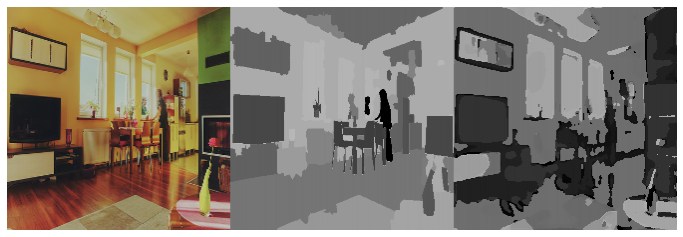

(224, 224, 3)


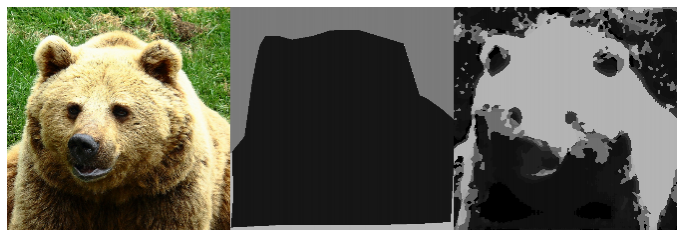

(224, 224, 3)


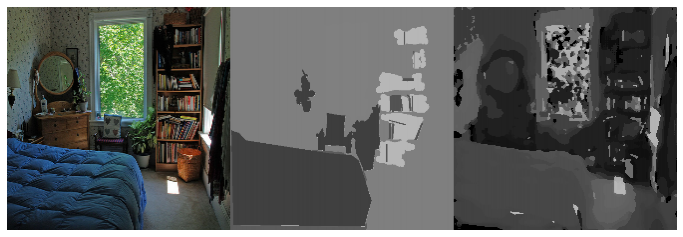

(224, 224, 3)


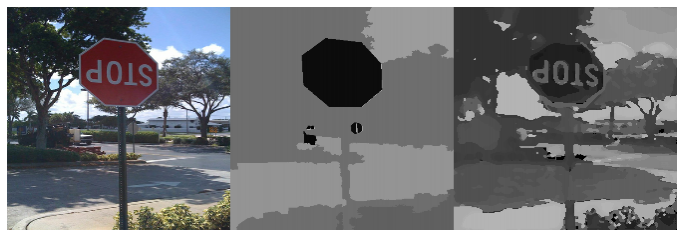

(224, 224, 3)


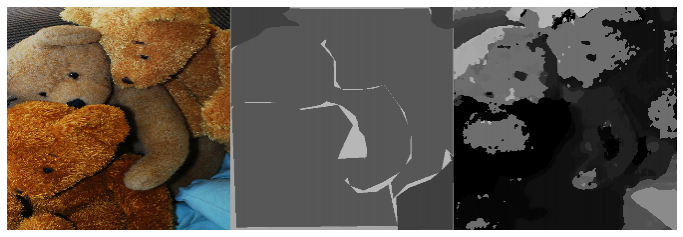

(224, 224, 3)


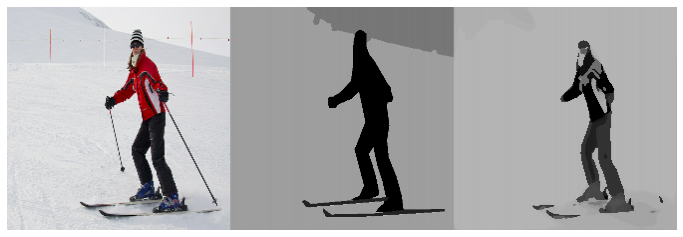

(224, 224, 3)


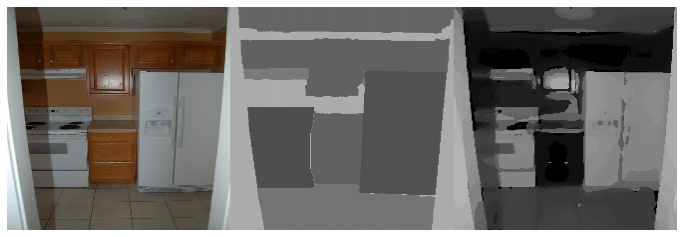

(224, 224, 3)


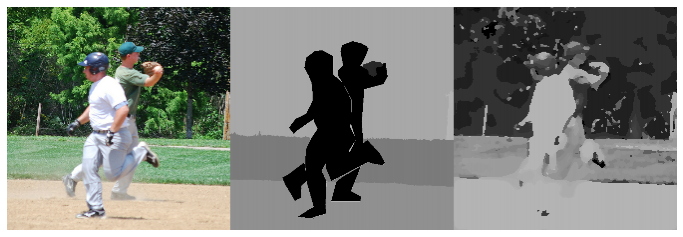

(224, 224, 3)


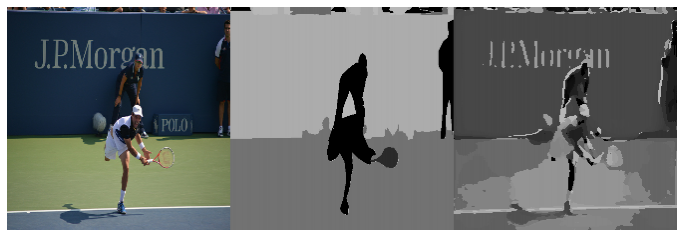

(224, 224, 3)


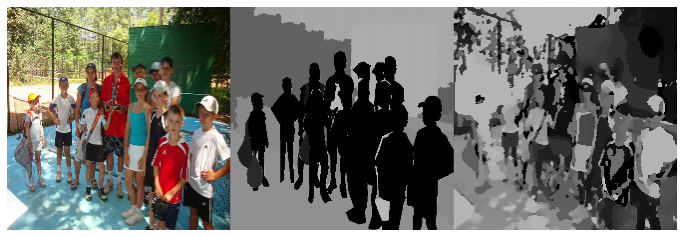

In [12]:
for batch in val_dataset.take(10):
    img, mask = batch
    img = img.numpy()
    mask = mask.numpy()
    predicted_mask = segmentation_model.predict(img.reshape(-1, 224, 224, 3)).argmax(axis=-1)
    img = (img * data.image_std) + data.image_mean
    predicted_mask_gray = skimage.color.gray2rgb(predicted_mask[0] / 255.0)
    mask_gray = skimage.color.gray2rgb(mask.astype('float')[:,:,0] / 255.0)
    print(mask_gray.shape)
    plt.figure(figsize=(12, 6))
    plt.imshow(np.hstack([img, mask_gray, predicted_mask_gray]))
    plt.axis('off')
    plt.show()